# A Predictive Modeling Approach to Understand and Address H1N1 Vaccine Hesitancy

## Business Understanding

### Business Overview

Vaccination is one of the most effective tools in public health to combat the spread of infectious diseases. In addition to protecting individuals, vaccines contribute to herd immunity, reducing transmission within communities. While modern attention has focused on the COVID-19 pandemic, this project revisits the public health response to a prior global outbreak: the 2009 H1N1 (swine flu) pandemic.

The H1N1 virus emerged in early 2009 and led to an estimated 151,000 to 575,000 deaths worldwide during its first year. A vaccine was introduced in October 2009, and to assess public response, the U.S. launched the National 2009 H1N1 Flu Survey. This telephone survey gathered data on whether individuals received the H1N1  vaccines, alongside questions about their personal, economic, and demographic backgrounds, opinions on vaccine safety and effectiveness, and behaviors related to disease prevention. Despite the availability of the vaccine, not everyone chose to get vaccinated.



### The Business Problem

Public health organizations face the challenge of increasing vaccine uptake during pandemics. To design more targeted and effective vaccination campaigns, they need to identify which individuals are likely — or unlikely — to receive the H1N1 vaccine.

This project aims to analyze survey data collected during the 2009 H1N1 pandemic to uncover patterns in vaccination behavior. By building a predictive model, we seek to identify key factors influencing vaccine acceptance. These insights can support public health agencies in developing data-driven strategies to better understand and address vaccine hesitancy in future campaigns.


### Stakeholders

The outcomes of this project are valuable to several key stakeholders:

* Public Health Agencies (CDC, WHO, local departments):
Use predictions and feature insights to tailor outreach and vaccine education campaigns.

* Healthcare Providers:
Identify at-risk populations for vaccine refusal and intervene through personalized guidance and education.

* Policy Makers:
Allocate resources more effectively by targeting communities or demographics less likely to get vaccinated.

* Non-Profit Organizations and NGOs:
Support data-driven public awareness campaigns and deliver educational programs where needed most.

* Data Scientists and Researchers:
Gain insights into behavioral modeling and apply findings to health-related prediction tasks.

## Data Understanding

### Data Source:

This project uses data from the National 2009 H1N1 Flu Survey (NHFS), conducted in the United States following the emergence of the H1N1 (swine flu) pandemic. The survey was designed to assess vaccine uptake and gather individual-level data on demographics, opinions, and behaviors related to flu prevention and vaccination. It is a relevant and high-quality source for modeling public health behavior during a real-world pandemic scenario.

The dataset is divided into three files:

* training_set_features.csv – Includes responses from 26,707 individuals with 36 features related to demographic, behavioral, and opinion-based attributes.

* training_set_labels.csv – Contains binary indicators of whether the respondent received the H1N1 vaccine and the seasonal flu vaccine.

* test_set_features.csv – Contains data for 26,708 individuals with the same features as the training set; target labels are not provided.

The dataset includes:

* Demographic features (e.g., age group, sex, race, income, education):
Important for identifying population-level trends in vaccine uptake.

* Behavioral features (e.g., face mask use, hand washing, social behavior):
Reflect how seriously individuals took preventive measures, which may correlate with vaccination behavior.

* Opinion features (e.g., trust in vaccine effectiveness, perceived risk of illness):
Crucial for understanding personal beliefs and vaccine hesitancy.

These features are highly relevant for predicting H1N1 vaccine behavior, as they reflect key factors studied in public health research: health beliefs, socio-demographics, and behavioral intentions.



## Data Preparation

### Data Cleaning and Prepocessing



In [22]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,f1_score, accuracy_score,precision_score,recall_score, roc_auc_score, confusion_matrix, roc_curve

In [ ]:
# Loading the data of training_set_features ,test_set_features and training_set_labels.

features = pd.read_csv("training_set_features.csv")
features_test = pd.read_csv("test_set_features.csv")
labels= pd.read_csv("training_set_labels.csv")
features_test.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [7]:
# Drop the respondent_id in the above df
features = features.drop(columns=["respondent_id"])
features_test = features_test.drop(columns=["respondent_id"])
features_test

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


We are dropping the respondent_id since it is a unique identifier and it does not carry any predictive information about whether someone got the H1N1 vaccine. By including it could mislead the model into thinking that certain IDs are associated with certain outcomes — which is just random noise.

In [ ]:
#Extract the target column (h1n1_vaccine)
target = labels["h1n1_vaccine"]

#Step 1: Split into training and validation sets 
X_train, X_val, y_train, y_val = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

Splitting before preprocessing ensures there's no data leakage.

In [9]:
# Step 2: Identify column types
categorical_cols = X_train.select_dtypes(include="object").columns.tolist()
numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_cols

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [10]:
# Step 3: Impute missing values 

# Numerical
num_imputer = SimpleImputer(strategy="median")
X_train[numerical_cols] = num_imputer.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = num_imputer.transform(X_val[numerical_cols])
features_test[numerical_cols] = num_imputer.transform(features_test[numerical_cols])

# Categorical
cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
X_val[categorical_cols] = cat_imputer.transform(X_val[categorical_cols])
features_test[categorical_cols] = cat_imputer.transform(features_test[categorical_cols]) 



I have used median to impute the numerical features since it is robust to outliers, gives a better central tendancy than mean for skewed data and it avoids data leakage.

In [11]:
# Step 4: One-hot encode categorical features ---
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_cols)
X_test_encoded = pd.get_dummies(features_test, columns=categorical_cols)


# Align all datasets to the same columns
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join="left", axis=1, fill_value=0)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join="left", axis=1, fill_value=0)

The pd.get_dummies() is used  to convert categorical columns into one-hot encoded columns. It turns each category into binary columns of 0 or 1.  

We align encoded features so all datasets have matching columns.

In [12]:
# Step 5: Scale numerical features
scaler = StandardScaler()
X_train_encoded[numerical_cols] = scaler.fit_transform(X_train_encoded[numerical_cols])
X_val_encoded[numerical_cols] = scaler.transform(X_val_encoded[numerical_cols])
X_test_encoded[numerical_cols] = scaler.transform(X_test_encoded[numerical_cols])

# Shapes for verification
print("X_train_encoded:", X_train_encoded.shape)
print("X_val_encoded:", X_val_encoded.shape)
print("X_test_encoded:", X_test_encoded.shape)

X_train_encoded: (21365, 105)
X_val_encoded: (5342, 105)
X_test_encoded: (26708, 105)


I have used the StandardScaler inorder to standardize my numerical features to have a mean of 0 and a std.dev of 1. Scaling is applied after encoding.

## Exploratory Data Analysis  

The Goal is to understand the structure , patterns and quality of the dataset before building the model.

### Target Variable Distribution

It Checks for class imbalance.

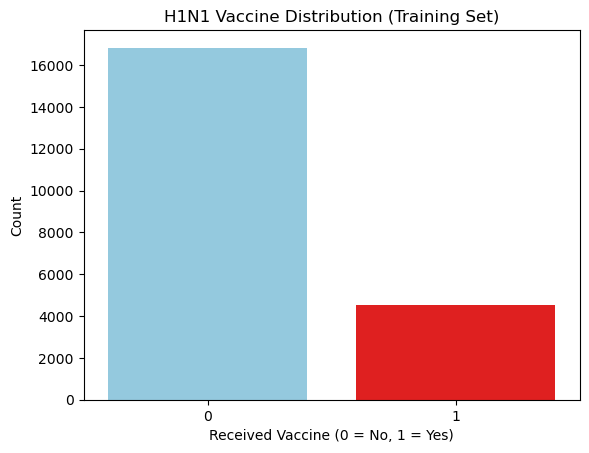

In [13]:
# Plotting
# Convert y_train to DataFrame
df = pd.DataFrame({'Vaccine': y_train})

# Use hue to control color by class
sns.countplot(data=df, x='Vaccine', hue='Vaccine', palette={0: "skyblue", 1: "red"}, legend=False)

plt.title("H1N1 Vaccine Distribution (Training Set)")
plt.xlabel("Received Vaccine (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The bar chart above illustrates the distribution of the target variable:

* Label 0 represents individuals who did not receive the H1N1 vaccine.

* Label 1 represents individuals who did receive the vaccine.

As shown, a significantly higher number of people around 17,000 did not get vaccinated, while only about 4,000 did.
This indicates a clear class imbalance, where the majority class label 0 dominates the dataset.

Such imbalance can bias machine learning models toward always predicting the majority class.

 

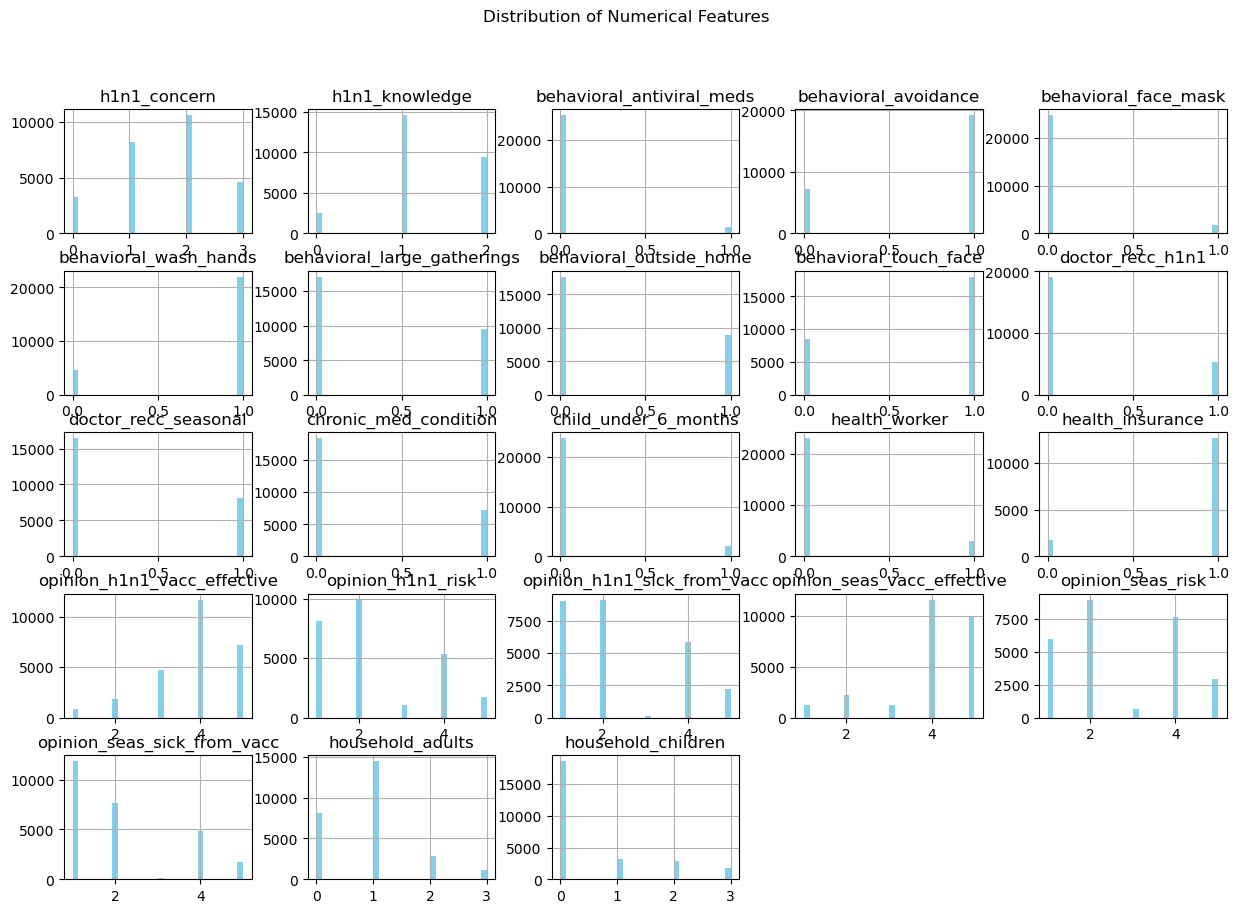

In [14]:
# Distribution of Numerical features
features[numerical_cols].hist(bins=30, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()

### Interpretation of Numerical Features Distribution 

The plot above displays the distribution of numerical features in the dataset.
Many features such as behavioral_avoidance, behavioral_face_mask, doctor_recc_h1n1, and chronic_med_condition — are binary (taking values of 0 or 1). These distributions are heavily skewed toward 0, indicating that the majority of respondents either did not engage in certain preventive behaviors or did not have specific medical conditions.

This skeweness may influence the predictive power and interpretation of these variables in modeling.


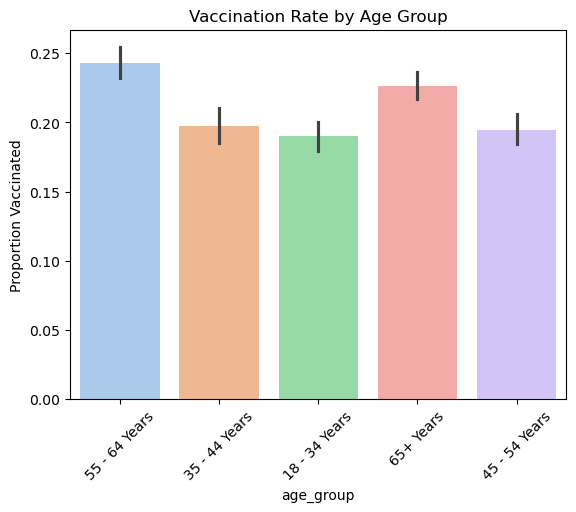

In [15]:
# Relationships between categorical features and target
# Plotting vaccination rate by age group
# Merge features and target temporarily for visualization
merged = pd.concat([features, target], axis=1)

# Barplot of H1N1 vaccine uptake by age group with color
sns.barplot(data=merged, x="age_group", y="h1n1_vaccine", hue="age_group", palette="pastel", legend=False)
plt.title("Vaccination Rate by Age Group")
plt.ylabel("Proportion Vaccinated")
plt.xticks(rotation=45)
plt.show()



### Vaccination Rate by Age Group Interpretation

The bar plot illustrates that the 55–64 age group has the highest vaccination rate, with approximately 24–25% of individuals vaccinated.

This is followed closely by the 65+ group, with a vaccination rate of about 22–23%.

In contrast, the younger age groups — 18–34, 35–44, and 45–54 years — exhibit lower and relatively similar vaccination rates, all hovering around 19–20%.

These trends suggest that older adults are more likely to get vaccinated, possibly due to higher perceived risk or more frequent medical engagement.


## Modelling and Evaluation
### Baseline model - Logistic Regression 

I have selected Logistic regression as the baseline model due to it's interpretability and simplicity. It provides a good starting point to understand how well the preprocessed data can predict H1N1 vaccination uptake.

Accuracy: 0.8367652564582553
ROC AUC Score: 0.8287481845340627

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4207
           1       0.68      0.44      0.54      1135

    accuracy                           0.84      5342
   macro avg       0.77      0.69      0.72      5342
weighted avg       0.82      0.84      0.82      5342



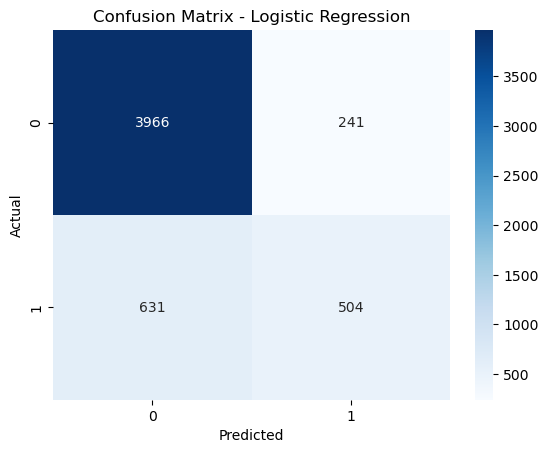

In [16]:
# Train baseline model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train_encoded, y_train)

# Predict on validation set
y_pred = baseline_model.predict(X_val_encoded)
y_prob = baseline_model.predict_proba(X_val_encoded)[:, 1]

# Model Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_prob))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


# Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Intepretation of the Model 
The Accuracy is at 0.837 which means 83.7% of the total predictions were correct. This can be misleading due to class imbalance of class 0.

ROC AUC score is 0.829 which means the model is good at ranking vaccinated vs non-vaccinated casses. AUC tells us how the model separates the two classes 0.5 - No discrimination and 1.0 - perfect discrimination.

* Precision -  When it predicts not vaccinated(class 0), it's right 86% of the time. When it predicts vaccinated(class 1), it's right 68% of the time
* Recall - It finds 94% of all actual non-vaccinated (class 0)cases. It only finds 44% of all actual vaccinated(class1) cases.
* F1-Score - Strong performance on majority class(class 0).  Weaker performance on minority class (class 1).

The model perfomance better on class 0 (not vaccinated) — this is expected due to class imbalance. It's missing many true positives for class 1 (vaccinated) → low recall.


### Confusion Matrix Interpretation

* 3966 True Negatives (TN): Model correctly predicted class 0 (not vaccinated).
* 241 False Positives (FP): Model incorrectly predicted vaccinated when not.
* 631 False Negatives (FN): Model missed actual vaccinated cases.
* 504 True Positives (TP): Model correctly predicted vaccinated.

The above matrix intrepretion means the following:

* High TN (3966) shows the model is good at identifying non-vaccinated individuals.
* Low TP (504) and high FN (631) suggest poor recall on the vaccinated class.
* The model is biased toward the majority class (0), which is expected due to class imbalance.

## Modify Logistic Regression 

This is done by applying class_weight='balanced' which helps to address class imbalance by penalizing mistakes on the minority class more heavily, which often leads to better recall on people who received vaccine.


Accuracy: 0.7714339198801947
ROC AUC Score: 0.8287136291622208

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      4207
           1       0.48      0.72      0.57      1135

    accuracy                           0.77      5342
   macro avg       0.69      0.75      0.71      5342
weighted avg       0.82      0.77      0.79      5342



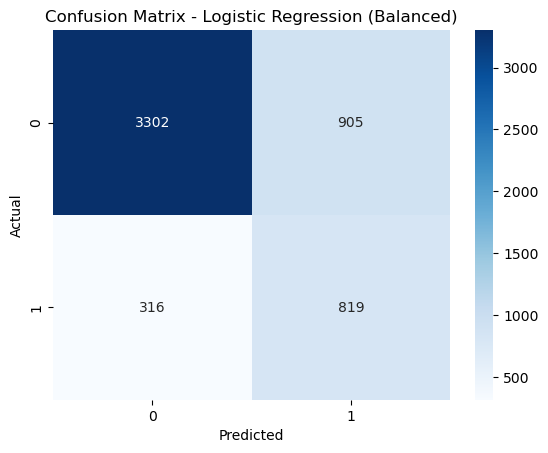

In [17]:
# Train logistic regression with balanced class weights
lr_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_balanced.fit(X_train_encoded, y_train)


# Make predictions
y_pred_balanced = lr_balanced.predict(X_val_encoded)

# Accuracy & AUC
acc = accuracy_score(y_val, y_pred_balanced)
auc = roc_auc_score(y_val, lr_balanced.predict_proba(X_val_encoded)[:, 1])
print("Accuracy:", acc)
print("ROC AUC Score:", auc)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_balanced))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_balanced)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Balanced)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Balanced logistic Regression Interpretation Results 
* The Accuracy is-0.771
* ROC AUC matrix score - 0.829

### Comparing results of Logistic Regression to balanced Logistic Regression
* Using class_weight='balanced' has improved recall for class 1 dramatically (from 44% → 72%) at the cost of some precision and overall accuracy.

* ROC AUC remained the same, which suggests the model still ranks predictions well. This tradeoff is justifiable and desirable when it's more important to identify vaccinated individuals, even at the cost of some false positives.




## Random Forest Classifier (with Class Imbalance Handling)

Random Forest Results
Accuracy: 0.8317109696742793
ROC AUC Score: 0.8227785869784888

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4207
           1       0.69      0.37      0.48      1135

    accuracy                           0.83      5342
   macro avg       0.77      0.66      0.69      5342
weighted avg       0.82      0.83      0.81      5342



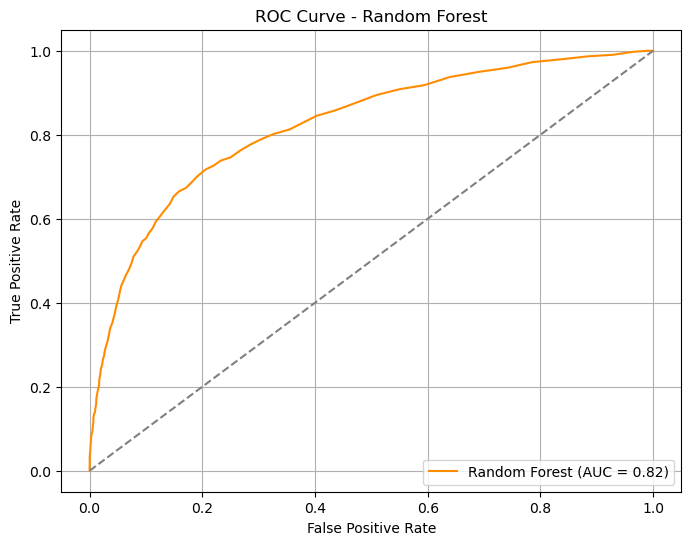

In [18]:
# 1. Train the model
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',  # handles class imbalance
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_encoded, y_train)

# 2. Make predictions
y_pred_rf = rf.predict(X_val_encoded)
y_probs_rf = rf.predict_proba(X_val_encoded)[:, 1]  # for ROC AUC

# 3. Evaluation
acc_rf = accuracy_score(y_val, y_pred_rf)
auc_rf = roc_auc_score(y_val, y_probs_rf)
print("Random Forest Results")
print("Accuracy:", acc_rf)
print("ROC AUC Score:", auc_rf)
print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_probs_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_rf:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



### ROC Curve Intrepretation 

What the Curve Represents:
1. X-axis: False Positive Rate (FPR) — proportion of actual negatives incorrectly predicted as positive.

2. Y-axis: True Positive Rate (TPR) — proportion of actual positives correctly predicted (i.e., recall).

3. Diagonal line: A model with no discrimination — equivalent to random guessing (AUC = 0.50).


High TPR with low FPR early on — your model is correctly identifying many positives with few false alarms at good thresholds.

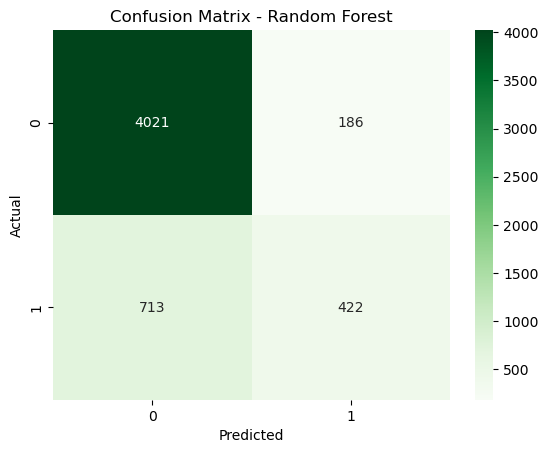

In [19]:
# 4. Confusion Matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Intrepretation of the Confusion matrix:
True Negatives (TN): 4021
→ Correctly predicted class 0

False Positives (FP): 186
→ Incorrectly predicted class 1 when it was actually 0

False Negatives (FN): 713
→ Predicted class 0 when it was actually 1 (missed positives)

True Positives (TP): 422
→ Correctly predicted class 1



### Random Forest Results 
Overall Model Performance
* Accuracy: 83.2% - The model correctly predicted the class for 83% of the total validation samples.
* ROC AUC Score: 0.823- Measures the model’s ability to distinguish between vaccinated and non- vaccinated. A value above 0.8 is considered good, especially in imbalanced scenarios.

Class 0 (majority class)
* Precision: 0.85 - Of all instances predicted as class 0, 85% were correct.
* Recall: 0.96 - The model correctly identified 96% of all actual class 0 cases.
* F1-score: 0.90 - Very strong overall performance for class 0.

Class 1 (minority class)
* Precision: 0.69 - Of all instances predicted as class 1, 69% were actually class 1.
* Recall: 0.37 - The model only caught 37% of actual class 1 cases (a weakness).
* F1-score: 0.48 - Moderate to weak — this reflects the trade-off between decent precision but poor recall.


## Comparison between the logistic regression balanced model and the random forest classifier


In [20]:
# Define a function to evaluate and summarize model performance
def evaluate_model(name, model, X_val, y_val):
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]  # For AUC

    return {
        'Model': name,
        'Accuracy': accuracy_score(y_val, y_pred),
        'Recall (Class 1)': recall_score(y_val, y_pred),
        'Precision (Class 1)': precision_score(y_val, y_pred),
        'F1-Score (Class 1)': f1_score(y_val, y_pred),
        'ROC AUC Score': roc_auc_score(y_val, y_prob)
    }

# Evaluate both models
results = []
results.append(evaluate_model("Logistic Regression (Balanced)", lr_balanced, X_val_encoded, y_val))
results.append(evaluate_model("Random Forest", rf, X_val_encoded, y_val))  # replace rf_model with your RF model variable

# Convert results to a dataframe for display
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                            Model  Accuracy  Recall (Class 1)  \
0  Logistic Regression (Balanced)  0.771434          0.721586   
1                   Random Forest  0.831711          0.371806   

   Precision (Class 1)  F1-Score (Class 1)  ROC AUC Score  
0             0.475058            0.572928       0.828714  
1             0.694079            0.484223       0.822779  


### Intrepretation 
1. Logistic Regression (Balanced):

* Best recall (72%) — catches more of the actual vaccinated people.
* Lower precision — it makes more false positives, but that’s acceptable if your goal is not to miss vaccinated individuals.
* Higher F1-score — it’s better at balancing precision and recall.
* Better ROC AUC — separates the classes more reliably across all thresholds.

2. Random Forest:

* Higher accuracy — but that’s driven by correctly predicting the majority class (not vaccinated).
* Much lower recall for class 1 — it misses many vaccinated individuals.
* Higher precision — when it does predict someone as vaccinated, it's more confident.
* Lower F1 and slightly lower ROC AUC.


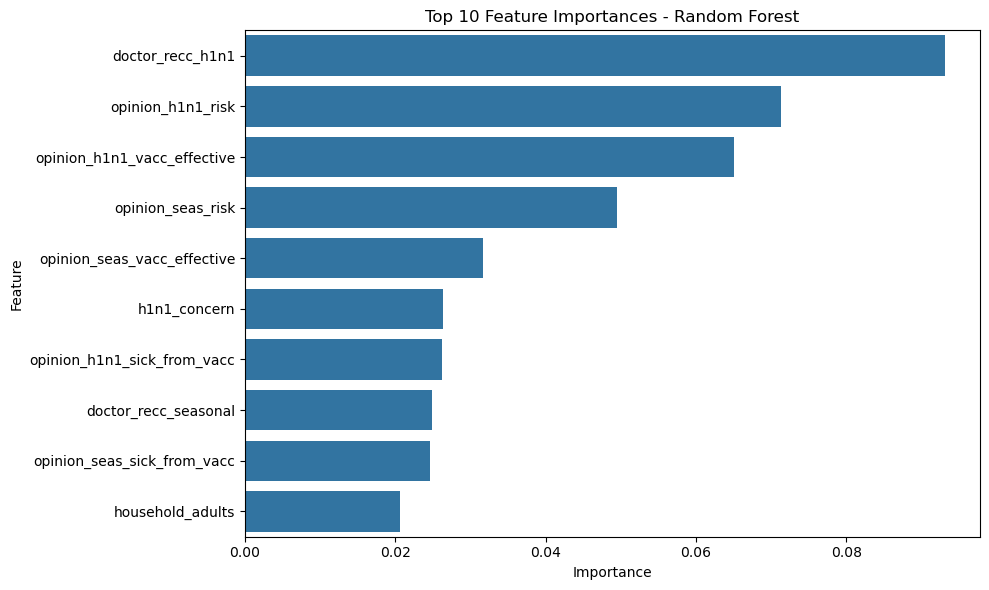

In [21]:
# 5 Feature Importances (Top 10)
importances = rf.feature_importances_
feature_names = X_train_encoded.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Interpretation:
The strongest predictors of H1N1 vaccination are:

* Doctor's recommendation (doctor_recc_h1n1): People are much more likely to get vaccinated when their doctor recommends it.

* Perceived personal risk (opinion_h1n1_risk): Individuals who believe they are at high risk of contracting H1N1 are more likely to seek vaccination.

* Belief in vaccine effectiveness (opinion_h1n1_vacc_effective): People who trust that the vaccine works are more likely to take it.

This highlights that trust in medical advice and belief in vaccine efficacy are key drivers of vaccination behavior.

Negative influences include:

* Fear of side effects (opinion_h1n1_sick_from_vacc, opinion_seas_sick_from_vacc): Individuals who think the vaccine might make them sick are less likely to get vaccinated.

* Number of adults in the household (household_adults): While a weaker factor, this may reflect lower perceived risk or more vaccine hesitancy in larger households.



## Conclusion 
1.  **Balanced Logistic Regression** 

* It is best at identifying vaccinated individuals has a recall of 72% — critical for understanding what factors drive vaccine acceptance.
* Balanced precision and recall makes it better suited for modeling behavior.
* Slightly lower accuracy is acceptable given the focus on public health insight.
* ROC AUC indicates strong discriminatory ability.

2. **Random Forest**

* Higher accuracy and precision, but recall for vaccinated class drops to 37%.
* Provides strong feature importance analysis — useful for interpretation.
* May miss many vaccinated individuals, reducing value for outreach planning.

## Recommendations

* Use Balanced Logistic Regression as your final model.

1. It better addresses the business problem by identifying who is vaccinated, enabling targeted interventions.

2. It performs well in recall, F1 score, and AUC, and handles class imbalance fairly.

3. It is interpretable and explainable, which is important for public health policy.

Use Random Forest as a supporting model for exploratory analysis and validation, especially for understanding complex feature interactions.